# 实现多输出

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
print(tf.__version__)
print(sys.version_info)
for module in np, pd ,sklearn, tf, keras:
    print(module.__name__,module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
numpy 1.18.1
pandas 1.0.1
sklearn 0.22.2
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

print(housing.data.shape)
print(housing.target.shape)

(20640, 8)
(20640,)


In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(housing.data, housing.target,random_state=7)
# x_train, x_valid, y_train, y_valid = train_test_split(x_train_all,y_train_all,random_state=11)

In [4]:
from sklearn.preprocessing import StandardScaler
transfer = StandardScaler()
x_train_scaled = transfer.fit_transform(x_train)
x_test_scaled = transfer.transform(x_test)
# x_valid_scaled = transfer.transform(x_valid)

In [5]:
#多输出
input_wide = keras.layers.Input(shape=[6],)
input_deep = keras.layers.Input(shape=[6],)
hidden1 = keras.layers.Dense(30,activation = 'relu')(input_deep)
hidden2 = keras.layers.Dense(30,activation = 'relu')(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)
output2= keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_wide, input_deep],
                                    outputs = [output, output2])

model.compile(loss='mean_squared_error',
             optimizer = 'nadam',# SGD -> SGDM -> NAG ->AdaGrad -> AdaDelta -> Adam -> Nadam
             )


In [6]:
model.layers#查看模型层数

In [7]:
model.summary()#d 模型参数

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
______________________________________________________________________________________________

In [9]:
#多输入，所以拆分训练数据
x_train_scaled_wide = x_train_scaled[:,:6]
x_train_scaled_deep = x_train_scaled[:,2:]
x_test_scaled_wide = x_test_scaled[:,:6]
x_test_scaled_deep = x_test_scaled[:,2:]
# x_valid_scaled_wide = x_valid_scaled[:,:5]
# x_valid_scaled_deep = x_valid_scaled[:,2:]

In [10]:
callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]
history = model.fit([x_train_scaled_wide, x_train_scaled_deep],
                          [y_train,y_train],
                          epochs=100,
                    validation_split = 0.2,
#                             validation_data=([x_valid_scaled_wide,x_valid_scaled_deep],
#                                                      [y_valid,y_valid]),
                   callbacks= callbacks 
                   )
#validation_data:训练过程中在验证集验证

Train on 12384 samples, validate on 3096 samples
Epoch 1/100
12384/12384 [==============================] - 7s 552us/sample - loss: 3.4832 - dense_2_loss: 1.9589 - dense_3_loss: 1.5243 - val_loss: 2.1784 - val_dense_2_loss: 1.2650 - val_dense_3_loss: 0.9109
Epoch 2/100
12384/12384 [==============================] - 3s 226us/sample - loss: 1.2794 - dense_2_loss: 0.6404 - dense_3_loss: 0.6390 - val_loss: 1.1631 - val_dense_2_loss: 0.5816 - val_dense_3_loss: 0.5802
Epoch 3/100
12384/12384 [==============================] - 3s 224us/sample - loss: 1.0611 - dense_2_loss: 0.4940 - dense_3_loss: 0.5671 - val_loss: 0.9930 - val_dense_2_loss: 0.4524 - val_dense_3_loss: 0.5395
Epoch 4/100
12384/12384 [==============================] - 3s 224us/sample - loss: 0.9891 - dense_2_loss: 0.4437 - dense_3_loss: 0.5454 - val_loss: 0.9397 - val_dense_2_loss: 0.4159 - val_dense_3_loss: 0.5227
Epoch 5/100
12384/12384 [==============================] - 3s 238us/sample - loss: 0.9376 - dense_2_loss: 0.4140 - 

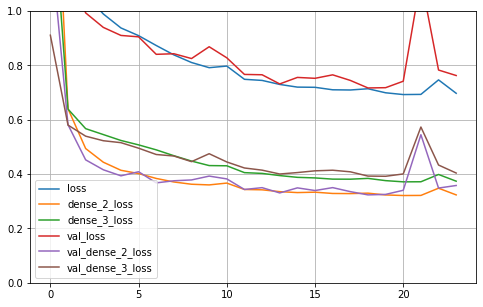

In [11]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=[8,5])
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)

In [12]:
model.evaluate([x_test_scaled_wide,x_test_scaled_deep],
                       [y_test,y_test], verbose = 2)

5160/1 - 0s - loss: 1.1179 - dense_2_loss: 0.4532 - dense_3_loss: 0.4519


[0.9030859365019688, 0.4531817, 0.45189333]